In [4]:
import pandas as pd
import numpy as np

## Load data
UCI adult dataset

In [5]:
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours",
    "native",
    "class"
]

In [6]:
data = pd.read_csv(link, names=names)

In [7]:
data.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours,native,class
16851,32,Private,193380,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States,<=50K
1790,30,Federal-gov,188569,9th,5,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K
1846,21,?,163665,Some-college,10,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K
14630,25,Private,160300,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,35,United-States,<=50K
28791,64,Local-gov,158412,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [8]:
print(data.shape)

(32561, 15)


## detect class imbalance

<AxesSubplot:>

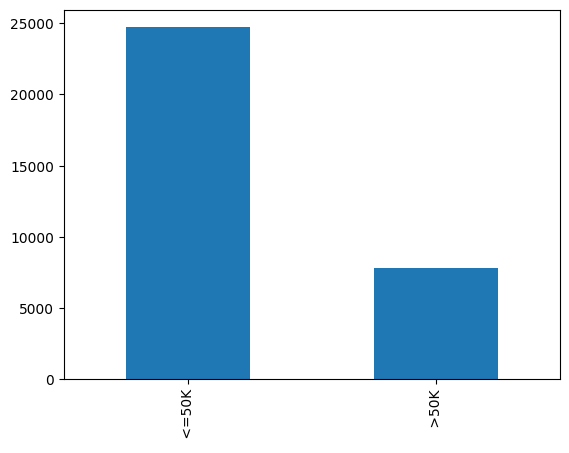

In [9]:
g = data[names[-1]].value_counts()
g.plot.bar()

In [10]:
types = data.dtypes
print(types)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours              int64
native            object
class             object
dtype: object


## detect NA values

In [11]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours             0
native            0
class             0
dtype: int64

## Encode categorical features into numerical ones 

In [12]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

for ft in names:
    if data[ft].dtype == "object":
        le.fit_transform(data[ft])
        data[ft] = le.transform(data[ft])

In [13]:
data.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours,native,class
5392,63,4,216413,9,13,6,1,1,4,0,0,0,25,39,0
30080,58,4,72812,0,6,4,8,1,4,1,0,0,40,39,0
6290,35,4,317153,11,9,4,12,1,4,0,0,0,40,39,0


## X, y separation

In [14]:
X = data.values[:, :-1]
y = data.values[:, -1]
print(X.shape)
print(y.shape)

(32561, 14)
(32561,)


## Normalization

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
scaler.fit_transform(X)
X = scaler.transform(X)

In [17]:
X[0]

array([0.30136986, 0.875     , 0.0443019 , 0.6       , 0.8       ,
       0.66666667, 0.07142857, 0.2       , 1.        , 1.        ,
       0.02174022, 0.        , 0.39795918, 0.95121951])

# Modeling


## Train test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [20]:
X_train.shape, X_test.shape

((26048, 14), (6513, 14))

## K-Nearest Neighbor

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
from sklearn.metrics import accuracy_score, classification_report

In [24]:
y_pred = knn.predict(X_test)
score = accuracy_score(y_pred=y_pred, y_true=y_test)
print(f"acc: {score*100:.2f} %")

acc: 81.42 %


In [25]:
w_knn = KNeighborsClassifier(n_neighbors=3, weights="distance")
w_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [26]:
y_pred = w_knn.predict(X_test)
score = accuracy_score(y_pred=y_pred, y_true=y_test)
print(f"acc: {score*100:.2f} %")

acc: 81.24 %


In [27]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4987
           1       0.60      0.58      0.59      1526

    accuracy                           0.81      6513
   macro avg       0.74      0.73      0.73      6513
weighted avg       0.81      0.81      0.81      6513



# Multinomial Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [29]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [31]:
y_pred = mnb.predict(X_test)
score = accuracy_score(y_pred=y_pred, y_true=y_test)
print(f"acc: {score*100:.2f} %")

acc: 77.11 %


In [32]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4987
           1       0.97      0.02      0.05      1526

    accuracy                           0.77      6513
   macro avg       0.87      0.51      0.46      6513
weighted avg       0.82      0.77      0.68      6513



# Gaussian NB

In [34]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [35]:
y_pred = gnb.predict(X_test)
score = accuracy_score(y_pred=y_pred, y_true=y_test)
print(f"acc: {score*100:.2f} %")
print(classification_report(y_pred=y_pred, y_true=y_test))

acc: 80.79 %
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4987
           1       0.67      0.35      0.46      1526

    accuracy                           0.81      6513
   macro avg       0.75      0.65      0.67      6513
weighted avg       0.79      0.81      0.78      6513



# Bernoulli NB

In [38]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)
score = accuracy_score(y_pred=y_pred, y_true=y_test)
print(f"acc: {score*100:.2f} %")
print(classification_report(y_pred=y_pred, y_true=y_test))

acc: 72.81 %
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      4987
           1       0.45      0.74      0.56      1526

    accuracy                           0.73      6513
   macro avg       0.68      0.73      0.68      6513
weighted avg       0.80      0.73      0.75      6513

